In [65]:
import pandas as pd
from datetime import datetime, timedelta
from ast import literal_eval
import numpy as np
#rest2 = pd.read_csv('kaggle_task.csv')
#rest1 = pd.read_csv('main_task.csv')

In [66]:
#rest1['sample'] = 1
#rest2['sample'] = 0
#rest2['Rating'] = 0
#rest = rest2.append(rest1, sort = False).reset_index(drop = True)

In [67]:
rest = pd.read_csv('rest.csv')

In [68]:
def kolocen(s):
    try:
        return int(literal_eval(s)[i%10])
    except:
        return 0

In [69]:
for i in range(100, 105):
    rest[i] = rest['WOW'].apply(kolocen)

In [70]:
rest['Reviews'] = rest['Reviews'].fillna('[[], []]')

# Функция, возвращает 1 если есть, 0 если нет
def otzestornot(s):
    if s == '[[], []]':
        return 0
    return 1

# Добавляем столбцы
rest['otzestornott'] = rest['Reviews'].apply(otzestornot)

In [71]:
def ReviewsAnalyzer(reviews):
    res=0
    for re in reviews.split():
        review=re.lower()
        res+=review.count('good')
        res+=review.count('excellent')
        res+=review.count('nice')
        res+=review.count('great')
        res+=review.count('nice')
        res+=review.count('gem')
        res+=review.count('lovely')
        res+=review.count('delicious')
        res+=review.count('best')
        res+=review.count('perfect')
        res+=review.count('amazing')
        res+=review.count('love')
        res+=review.count('tasty')
        res+=review.count('clean')
        res+=review.count('fresh')
        res+=review.count('yamm')
        res+=review.count('bellyful')
        res+=review.count('pleasant')
        res-=review.count('bad')
        res-=review.count('awful')
        res-=review.count("don\\'t")
        res-=review.count('nothing')
        res-=review.count('wast')
        res-=review.count('trash')
        res-=review.count('worst')
        res-=review.count('overpriced')
        res-=review.count('disappoint')
        res-=review.count('loud')
        res-=review.count('nothing')
        res-=review.count('worth')
        res-=review.count('tasteless')
        res-=review.count('nasty')
        res-=review.count('disgus')
        res-=review.count('dirt')
        res-=review.count("not")
    return res
rest['Reviews2']=rest['Reviews'].apply(lambda r: ReviewsAnalyzer(r))
rest = pd.get_dummies(rest, columns=['Reviews2'], dummy_na=True)

In [72]:
#Расшариваем города
# Делаем список городов
spisokgorodov = set()
for i in rest['City']:
    spisokgorodov.add(i)

# Используемая функция, возвращающая 1 если ресторан в городе s
def spisgor(s):
    if gor in s:
        return 1
    return 0

# Делаем новые столбцы, используя функцию spisgor
for gor in spisokgorodov:
    rest[gor] = rest['City'].apply(spisgor)

In [73]:
# Усредняем Ranking
city_mean = rest.groupby(['City'])['Ranking'].mean()
city_count = rest['City'].value_counts(ascending=False)
rest['ratingmeancity'] = rest['City'].apply(lambda x: city_mean[x])
rest['ratingvccity'] = rest['City'].apply(lambda x: city_count[x])
rest['newranking'] = (rest['Ranking'] - rest['ratingmeancity']) / rest['ratingvccity']

In [74]:
# Делаем вручную словарь страна: город
countryes = {'Italy': ['Rome', 'Milan'], 'Germany': ['Berlin', 'Munich', 'Hamburg'], 'Slovenia': ['Ljubljana'], 'Holland': ['Amsterdam'], 'Sweden': ['Stockholm'], 'Denmark': ['Copenhagen'], 'Czech': ['Prague'], 'Switzerland': ['Geneva', 'Zurich'], 'Luxembourg': ['Luxembourg'], 'Portugal': ['Lisbon', 'Oporto'], 'Scotland': ['Edinburgh'], 'Austria': ['Vienna'], 'England': ['London'],'Belgium': ['Brussels'], 'Poland': ['Warsaw', 'Krakow'], 'France': ['Paris', 'Lyon'], 'Ireland': ['Dublin'], 'Finland': ['Helsinki'], 'Greece': ['Athens'], 'Spain': ['Madrid', 'Barcelona'], 'Norway': ['Oslo'], 'Romania': ['Budapest'], 'Slovakia': ['Bratislava']}

# Делаем новый столбец со странами
def countre(s):
    for i in countryes:
        if s in countryes[i]:
            return i
rest['Country'] = rest['City'].apply(countre)

# Делаем список стран
spisokstran = set()
for i in rest['Country']:
    spisokstran.add(i)

# Используемая функция, возвращающая 1 если страна есть s
def spisstr(s):
    if stra in s:
        return 1
    return 0
for stra in spisokstran:
    rest[stra] = rest['Country'].apply(spisstr)

In [75]:
naseleniestran = {'Italy': 60483973,
 'Germany': 82850000,
 'Slovenia': 2066880,
 'Holland': 17118084,
 'Sweden': 9995153,
 'Denmark': 5781190,
 'Czech': 10610055,
 'Switzerland': 8417700,
 'Luxembourg': 602005,
 'Portugal': 10291027,
 'Scotland': 5438000,
 'Austria': 8822267,
 'England': 55980000,
 'Belgium': 11413058,
 'Poland': 37976687,
 'France': 67221943,
 'Ireland': 4838259,
 'Finland': 5513130,
 'Greece': 10738868,
 'Spain': 46659302,
 'Norway': 5258317,
 'Romania': 19523621,
 'Slovakia': 5443120}
def naselstran(s):
    for i in naseleniestran:
        if s == i:
            return naseleniestran[i]
rest['NasStran'] = rest['Country'].apply(naselstran)

In [76]:
rest['Number_of_Reviews_isNAN'] = pd.isna(rest['Number of Reviews']).astype('uint8')
# ставим ноль
rest['Number of Reviews'] = rest['Number of Reviews'].fillna(0)

In [77]:
# Вручную делаем список нестоличных городов
nestol = ['Munich', 'Oporto', 'Milan', 'Barcelona', 'Zurich', 'Lyon', 'Hamburg', 'Geneva', 'Krakow']

# Используемая функция
def stol(s):
    if s in nestol:
        return 0
    else:
        return 1

# Применяем функцию
rest['Stolichniy'] = rest['City'].apply(stol)

# делаем список городов восточной Европы
vosteur = ['Bratislava', 'Warsaw', 'Budapest', 'Prague', 'Ljubljana', 'Krakow']

# Ипользуемая функция
def vosteuropa(s):
    if s in vosteur:
        return 0
    else:
        return 1
    
# Применяем функцию
rest['ZEur'] = rest['City'].apply(vosteuropa)

# делаем список из городов, входящих в рейтинг.
gorMek = ['Paris', 'London', 'Rome', 'Barcelona', 'Prague', 'Lisbon', 'Amsterdam', 'Budapest', 'Berlin', 'Edinburgh', 'Vienna', 'Krakow']

# Используемая функция
def Mek(s):
    if s in gorMek:
        return 1
    else:
        return 0

# Добавляем столбец
rest['Mekka'] = rest['City'].apply(Mek)

# Делаем список городов на пятерочку
citys5 = ['Milan', 'Berlin', 'Madrid', 'Paris', 'London', 'Barcelona', 'Rome']

# Используемая функция
def kolrest(s):
    if s in citys5:
        return 1
    else:
        return 0

# Применяем функцию
rest['City5'] = rest['City'].apply(kolrest)



In [78]:
# Заменяем пропущенные значения на '[propusk]'
rest['Cuisine Style'] = rest['Cuisine Style'].fillna('["propusk"]')

# Делаем общий set из кухонь
kuhni = set()  
for i in rest['Cuisine Style']: 
    for j in literal_eval(i):
        kuhni.add(j)

# Используемая функция, возвращающая 1 если эта кухня есть
def estornot(s):
    if kuh in s:
        return 1
    return 0

# Делаем новые столбцы, используя функцию estornot
for kuh in kuhni:
    rest[kuh] = rest['Cuisine Style'].apply(estornot)    

# Заменяем описание кухонь на количество
def lencuz(s):
    if literal_eval(s) == ["propusk"]:
        return 0
    return len(literal_eval(s))
rest['Cuisine Style'] = rest['Cuisine Style'].apply(lencuz)

rest = pd.get_dummies(rest, columns=['Cuisine Style'], dummy_na=True)

In [79]:
# заменяем пропущенные значения на пропуск
def prnarange(s):
    if pd.isna(s) == True:
        return 'napri'
    return s
rest['Price Range'] = rest['Price Range'].apply(prnarange)

# Функция: заменяем доллары на евро
def doleur(s):
    if s == '$':
        return 'a'
    if s == '$$ - $$$':
        return 'bb'
    if s == '$$$$':
        return 'ccc'
    return s
rest['Price Range'] = rest['Price Range'].apply(doleur)

# Делаем общий set из ценников
zennik = set()  
for i in rest['Price Range']: 
    zennik.add(i)
    
# Используемая функция, возвращающая 1 если этот ценник есть
def estornotzen(s):
    if zen in s:
        return 1
    return 0  
# Делаем новые столбцы, используя функцию estornot
for zen in zennik:
    rest[zen] = rest['Price Range'].apply(estornotzen)
    
# Заменяем ценники числовым эквивалентом
def prrangelen(s):
    if s == 'napri':
        return 0
    return len(s)
rest['Price Range'] = rest['Price Range'].apply(prrangelen)

In [80]:
naselenie = {'Amsterdam': 859732,
 'Athens': 655780,
 'Barcelona': 1620343,
 'Berlin': 3601131,
 'Bratislava': 424428,
 'Brussels': 1198726,
 'Budapest': 1749734,
 'Copenhagen': 615993,
 'Dublin': 553165,
 'Edinburgh': 482005,
 'Geneva': 495249,
 'Hamburg': 1830584,
 'Helsinki': 643272,
 'Krakow': 766739,
 'Lisbon': 505526,
 'Ljubljana': 279631,
 'London': 8787892,
 'Luxembourg': 602005,
 'Lyon': 515695,
 'Madrid': 3223334,
 'Milan': 1366180,
 'Munich': 1456039,
 'Oporto': 214349,
 'Oslo': 673469,
 'Paris': 2140526,
 'Prague': 1280508,
 'Rome': 2872800,
 'Stockholm': 961609,
 'Vienna': 1840573,
 'Warsaw': 1758143,
 'Zurich': 402762}
def nasel(s):
    for i in naselenie:
        if s == i:
            return naselenie[i]
rest['Citynasel'] = rest['City'].apply(nasel)

rest['1000000'] = rest['Citynasel'].apply(lambda x: 1 if x > 1000000 else 0)
rest['500000'] = rest['Citynasel'].apply(lambda x: 1 if x < 500000 else 0)
rest['500000-1000000'] = rest['Citynasel'].apply(lambda x: 1 if 500000 <=x <= 1000000 else 0)

In [81]:
# создаем признак количества дней, прошедших с последнего отзыва
rest['Reviews1'] = rest['Reviews'].str.findall('\d+/\d+/\d+')
def time(rek):
    if rek['Reviews1'] == []:
        return None
    return pd.datetime.now() - pd.to_datetime(rek['Reviews1']).max()

def timemax(rek):
    if rek['Reviews1'] == []:
        return None
    return pd.to_datetime(rek['Reviews1']).max().timestamp()

rest['reviews_day_max'] = rest.apply(timemax, axis = 1)
rest['reviews_day_max'] = rest['reviews_day_max'].fillna(rest['reviews_day_max'].mean())
rest['Reviews_delta'] = rest.apply(time, axis = 1).dt.days
rest['Reviews_delta'] = rest['Reviews_delta'].fillna(rest['Reviews_delta'].mean())

In [82]:
# Используемая функция
def raznotz(se):
    s = literal_eval(rest['Reviews'][1])[1][0]
    s1 = literal_eval(rest['Reviews'][1])[1][1]
    dt2 = datetime.strptime(s, '%m/%d/%Y') - datetime.strptime(s1, '%m/%d/%Y')
    if se == '[[], []]':
        return 0
    else:
        try:
            aw = datetime.strptime(literal_eval(se)[1][0], '%m/%d/%Y') -  datetime.strptime(literal_eval(se)[1][1], '%m/%d/%Y')
            return abs(aw.days)
        except:
            pass

# Применяем функцию
rest['razndatotz'] = rest['Reviews'].apply(raznotz)
# Заменяем пропущенные значения медианой
rest['razndatotz'] = rest['razndatotz'].fillna(0)

In [83]:
def name(s):
    a = 0
    b = ''
    for i in s:
        if i == '-':
            a += 1
        if a == 4:
            b += i
        if a > 4:
            break
    return b[1:]
rest['Name'] = rest['URL_TA'].apply(name)
rest['Name'] = rest['Name'].apply(lambda x: len(x))

In [84]:
def url_taq(s):
    a1 = 0
    b1 =''
    for i in s:
        if i == '-':
            a1 += 1
        if a1 == 1:
            b1 += i
        if a1 > 1:
            break
    return int(b1[2:])
rest['URL_TA1'] = rest['URL_TA'].apply(url_taq)

In [85]:
rest['ID_TA'] = rest['ID_TA'].apply(lambda x: int(x[1:]))
rest['Reviews'] = rest['Reviews'].apply(lambda x: len(x))
rest['URL_TA'] = rest['URL_TA'].apply(lambda x: len(x))
#rest = pd.get_dummies(rest, columns=['Name'], dummy_na=True)
#rest = pd.get_dummies(rest, columns=['URL_TA1'], dummy_na=True)

In [86]:
# айгенпара 1.77619, (0.70710678, -0.70710678)
rest['aigrank'] = 0.70710678 * rest['newranking'] + 0.70710678 * rest['Ranking']

In [87]:
rest['Country'] = rest['Country'].apply(lambda x: len(x))
rest['City'] = rest['City'].apply(lambda x: len(x))

In [88]:
# Уменьшаем размерность
rest['Ranking'] = rest['Ranking'].apply(lambda x: x / 100000)
rest['Number of Reviews'] = rest['Number of Reviews'].apply(lambda x: x / 10000)
rest['ratingmeancity'] = rest['ratingmeancity'].apply(lambda x: x / 10000)
rest['newranking'] = rest['newranking'].apply(lambda x: x / 10)
rest['Reviews'] = rest['Reviews'].apply(lambda x: x / 1000)
rest['URL_TA'] = rest['URL_TA'].apply(lambda x: x / 1000)
rest['ratingvccity'] = rest['ratingvccity'].apply(lambda x: x / 10000)
rest['Country'] = rest['Country'].apply(lambda x: x / 100)
rest['ID_TA'] = rest['ID_TA'].apply(lambda x: x / 100000000)
rest['NasStran'] = rest['NasStran'].apply(lambda x: x / 100000000)
rest['Citynasel'] = rest['Citynasel'].apply(lambda x: x / 10000000)
rest['reviews_day_max'] = rest['reviews_day_max'].apply(lambda x: x / 10000000000)
rest['Reviews_delta'] = rest['Reviews_delta'].apply(lambda x: x / 10000)
rest['razndatotz'] = rest['razndatotz'].apply(lambda x: x / 10000)
rest['URL_TA1'] = rest['URL_TA1'].apply(lambda x: x / 10000000)
rest['aigrank'] = rest['aigrank'].apply(lambda x: x / 100000)
rest['Price Range'] = rest['Price Range'].apply(lambda x: x / 10)
rest['Name'] = rest['Name'].apply(lambda x: x / 100)
rest['City'] = rest['City'].apply(lambda x: x / 100)


# Нормирование данных
#for i in rest.columns:
 #   if rest[i].dtype == object or -1 < rest[i].mean() < 1 or i == 'Rating':
  #      continue
   # rest[i] = (rest[i] - rest[i].mean()) / np.linalg.norm(rest[i] - rest[i].mean())

In [89]:
#Делаем функцию делящую лист на равные части
def split(arr, size):
    arrs = []
    while len(arr) > size:
        pice = arr[:size]
        arrs.append(pice)
        arr = arr[size:]
    arrs.append(arr)
    return arrs

#Делим на равные части
asde = split(sorted(rest['Ranking']), 4000)

 #Делаем функцию, возвращающую 1, если значение естьв промежутке
def parsrating(s):
    if asde[i][0] <= s <= asde[i][-1]:
        return 1
    return 0

 #Применяем функцию
for i in range(10):
    rest[i] = rest['Ranking'].apply(parsrating)

In [90]:
# Округляем до 0.5
def round_half(num):
    if num < 1.25:
        num = 1.0
    elif num < 1.75:
        num = 1.5
    elif num < 2.25:
        num = 2
    elif num < 2.75:
        num = 2.5
    elif num < 3.25:
        num = 3.0
    elif num < 3.75:
        num = 3.5
    elif num < 4.25:
        num = 4.0
    elif num < 4.75:
        num = 4.5
    else:
        num = 5.0
    return num

vfunc = np.vectorize(round_half)

In [91]:
# Удаляем ненужное
rest = rest.drop(['Reviews1', 'link', 'WOW'], axis = 1)

In [92]:
rest4 = rest.query('sample == 1').drop(['sample'], axis=1)
X = rest4.drop(['Restaurant_id', 'Rating'], axis = 1)  
y = rest4['Rating']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100, n_jobs=-1, verbose=1)  
  
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
  
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


MAE: 0.18563923781915165


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    0.2s finished


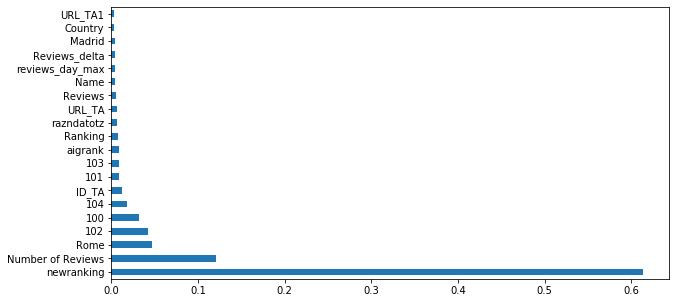

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

```
test_data = rest.drop(['Restaurant_id'], axis = 1)
test_data = test_data.query('sample == 0').drop(['sample'], axis=1)
test_data = test_data.drop(['Rating'], axis=1)
predict_submission = regr.predict(test_data)
predict_submission = vfunc(predict_submission)
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head()
```

In [95]:
pd.set_option('display.max_rows', 400)

In [96]:
rest.max()

Restaurant_id               id_9999
Name                           0.74
City                            0.1
Ranking                     0.16444
Price Range                     0.3
Number of Reviews             0.966
Reviews                        0.13
URL_TA                         0.13
ID_TA                      0.135073
sample                            1
Rating                            5
100                             996
101                             937
102                             530
103                             376
104                             588
otzestornott                      1
Reviews2_-8.0                     1
Reviews2_-7.0                     1
Reviews2_-6.0                     1
Reviews2_-5.0                     1
Reviews2_-4.0                     1
Reviews2_-3.0                     1
Reviews2_-2.0                     1
Reviews2_-1.0                     1
Reviews2_0.0                      1
Reviews2_1.0                      1
Reviews2_2.0                

In [97]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 263 entries, Restaurant_id to 9
dtypes: float64(20), int64(206), object(1), uint8(36)
memory usage: 88.3+ MB


In [98]:
rest.max()

Restaurant_id               id_9999
Name                           0.74
City                            0.1
Ranking                     0.16444
Price Range                     0.3
Number of Reviews             0.966
Reviews                        0.13
URL_TA                         0.13
ID_TA                      0.135073
sample                            1
Rating                            5
100                             996
101                             937
102                             530
103                             376
104                             588
otzestornott                      1
Reviews2_-8.0                     1
Reviews2_-7.0                     1
Reviews2_-6.0                     1
Reviews2_-5.0                     1
Reviews2_-4.0                     1
Reviews2_-3.0                     1
Reviews2_-2.0                     1
Reviews2_-1.0                     1
Reviews2_0.0                      1
Reviews2_1.0                      1
Reviews2_2.0                

In [99]:
rest.corr()['Rating']

Name                      -0.003934
City                      -0.000254
Ranking                   -0.109897
Price Range                0.015052
Number of Reviews          0.011006
Reviews                    0.011972
URL_TA                     0.002762
ID_TA                      0.049589
sample                     0.936543
Rating                     1.000000
100                        0.032364
101                        0.002103
102                       -0.017860
103                       -0.026022
104                       -0.049996
otzestornott               0.010309
Reviews2_-8.0              0.002112
Reviews2_-7.0             -0.001821
Reviews2_-6.0              0.000631
Reviews2_-5.0             -0.008377
Reviews2_-4.0             -0.008842
Reviews2_-3.0             -0.017053
Reviews2_-2.0             -0.031777
Reviews2_-1.0             -0.048647
Reviews2_0.0              -0.028235
Reviews2_1.0               0.025754
Reviews2_2.0               0.026404
Reviews2_3.0               0

In [100]:
rest.nunique()

Restaurant_id              13094
Name                          64
City                           7
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                      109
URL_TA                        74
ID_TA                      49963
sample                         2
Rating                        10
100                          766
101                          461
102                          246
103                          164
104                          180
otzestornott                   2
Reviews2_-8.0                  2
Reviews2_-7.0                  2
Reviews2_-6.0                  2
Reviews2_-5.0                  2
Reviews2_-4.0                  2
Reviews2_-3.0                  2
Reviews2_-2.0                  2
Reviews2_-1.0                  2
Reviews2_0.0                   2
Reviews2_1.0                   2
Reviews2_2.0                   2
Reviews2_3.0                   2
Reviews2_4.0                   2
Reviews2_5